In [94]:
import pandas as pd 
import numpy as np 
import re  #Regular Expression
from datetime import datetime  #timestamp
import matplotlib.pylab as plt
#from mlxtend.plotting import plot_decision_regions
import plotly.express as px

import scipy.stats as stats  #for chi-square
from scipy.stats import chi2_contingency  #for chi-square
import seaborn as sns  #for ANOVA
from scipy import stats  #for ANOVA
import statsmodels  #for ANOVA
import statsmodels.api as sm  #for ANOVA
from statsmodels.formula.api import ols  #for ANOVA
from sklearn.preprocessing import LabelEncoder #label encoder

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import graphviz

pd.set_option('display.max_columns', None)  #display all columns in dataframe
pd.set_option('display.max_rows', None)  #display all columns in dataframe

In [2]:
#from google.colab import files
#uploaded = files.upload()
##import io
##train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
##test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [3]:
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

In [4]:
train_df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

In [5]:
test_df.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3              1   
2                                  0                       2              4   
3                                  0                       0              2   
4                                  3                       4              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               3                4             3                       5   
1               5                4             5                       4   
2               2                2             2                       2   
3               3                4             4                       1   
4               4                1             2                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied

In [6]:
train_df_replica = train_df.copy()
test_df_replica  = test_df.copy()

In [7]:
# set up a flag field to distinguish records from training and testing sets in the combined dataset. Note : 'tst' should not be 
# used in the model developement.

In [8]:
train_df_replica['tst'] = 0
test_df_replica['tst']  = 1

In [9]:
dataset = pd.concat([train_df_replica,test_df_replica],axis = 0 , copy = True)

In [10]:
dataset.drop('Unnamed: 0',axis=1,inplace= True)

In [11]:
dataset.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

              satisfaction  tst  
0  neutral or dissatisfied    0  
1  neutral or dissatisfied    0  
2                satisfied    0  
3  neutral or dissatisfied    0  
4                satisfied    0

In [12]:
dataset.shape

(129880, 25)

In [13]:
dataset.satisfaction.value_counts(dropna=False)

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

## 1.3 Identify missing value and 'empty' values 

In [14]:
## identify the columns with missing values 
## This is a generic function which can be used to identify the missing 
## values in the given dataset.

def get_missing_columns(dataset_df):
    missing_df = dataset_df.isna().sum(axis = 0).to_frame()
    missing_df = missing_df.reset_index().rename(columns = {0 : "missing_count"})
    missing_df = missing_df.sort_values("missing_count",ascending = False)
    missing_df = missing_df[missing_df['missing_count'] > 0]
    return missing_df

get_missing_columns(dataset)

index  missing_count
22  Arrival Delay in Minutes            393

In [15]:
## Fill the missing values 
def col_to_fix(dataset_df):
    for c in dataset_df.columns: 
        if dataset_df[c].dtype == "object" : 
            dataset_df[c] = dataset_df[c].fillna("nan")
        else : 
            dataset_df[c] = dataset_df[c].fillna(dataset_df[c].mean())

In [16]:
col_to_fix(dataset)

In [17]:
get_missing_columns(dataset)

Empty DataFrame
Columns: [index, missing_count]
Index: []

## 1.5 First glimpse of distribution of the data. 

To analyze the dataset, we need to explore the correlation between the features 
and the label. Since many of the features are categorical in nature , we can check the correlation in an indirect way by looking into the distribution of 
label counts or label % of the features' uniques values.

Split train data into label_1 and label_0 to check if distributions of variables change due to different labels.

In [18]:
#label_1 = dataset.loc[dataset.satisfaction == 'neutral or dissatisfied',:]
#label_0 = dataset.loc[dataset.satisfaction == 'satisfied',:]

#label_1

In [19]:
label_1 = dataset.loc[dataset['satisfaction'] == 'neutral or dissatisfied',:]
label_0 = dataset.loc[dataset['satisfaction'] == 'satisfied',:]

### Feature : Plot of Various Features Distributions

In [20]:
def density_pltter(df,col_name,plt_title):
    ax = df[col_name].plot.hist(density=True, xlim=[0, df[col_name].max()], 
                                    bins=range(1,int(df[col_name].max())), figsize=(7, 7))
    df[col_name].plot.density(ax=ax)
    ax.set_xlabel(col_name)

    plt.title(plt_title)
    plt.tight_layout()
    plt.show()  

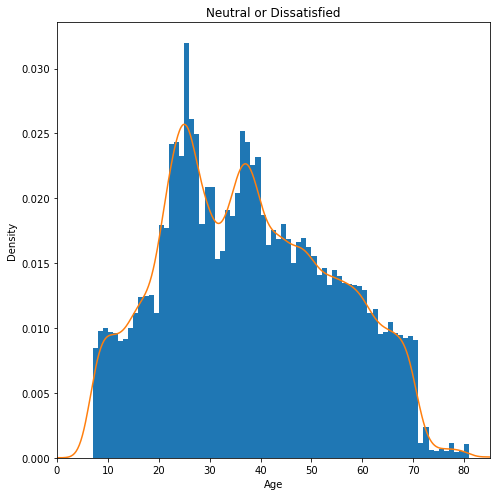

In [21]:
density_pltter(label_1,'Age','Neutral or Dissatisfied')

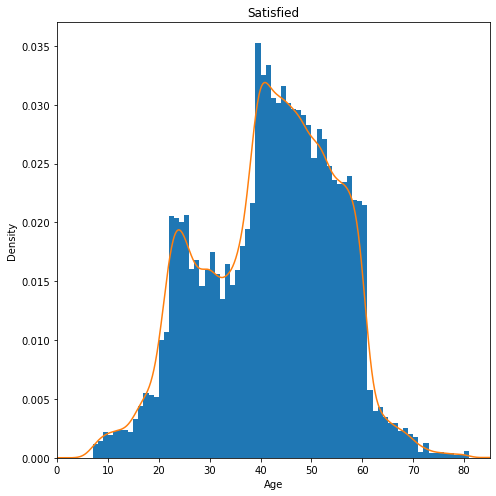

In [22]:
density_pltter(label_0,'Age','Satisfied')

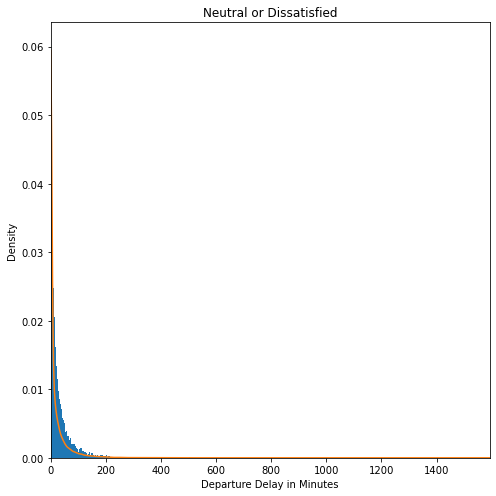

In [23]:
density_pltter(label_1,'Departure Delay in Minutes','Neutral or Dissatisfied')

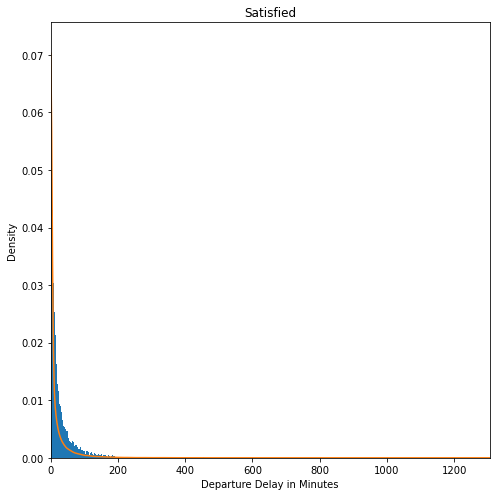

In [24]:
density_pltter(label_0,'Departure Delay in Minutes','Satisfied')

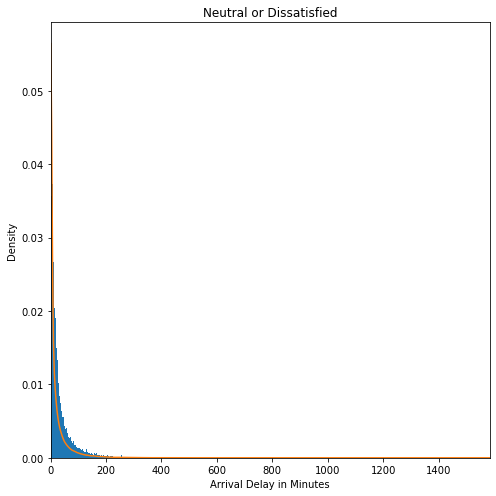

In [25]:
density_pltter(label_1,'Arrival Delay in Minutes','Neutral or Dissatisfied')

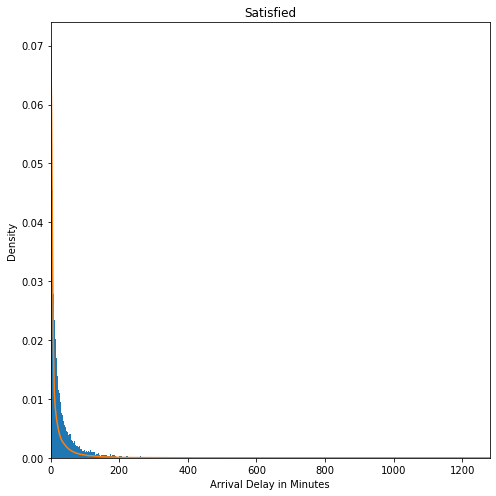

In [26]:
density_pltter(label_0,'Arrival Delay in Minutes','Satisfied')

In [95]:
label_1.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'tst'],
      dtype='object')

In [112]:
#fig = px.sunburst(dataset,['Customer Type','Type of Travel'],values = ['Flight Distance','Arrival Delay in Minutes'],color = ['Age','satisfaction'])
#fig.show()

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


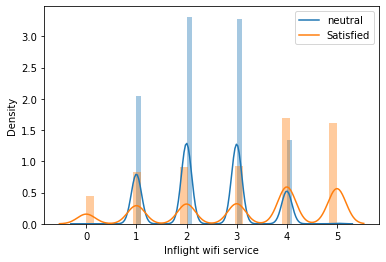

In [27]:
_=sns.distplot(label_1['Inflight wifi service'])
_=sns.distplot(label_0['Inflight wifi service'])
plt.legend(labels=["neutral","Satisfied"])

In [111]:
#px.strip(dataset, x='Flight Distance', y="Class", orientation="h", color="satisfaction")

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


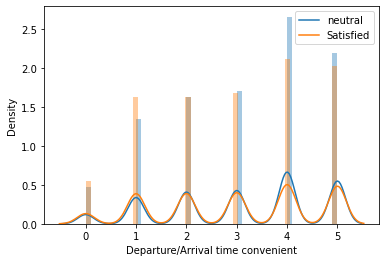

In [28]:
_= sns.distplot(label_1['Departure/Arrival time convenient'])
_= sns.distplot(label_0['Departure/Arrival time convenient'])
plt.legend(labels=["neutral","Satisfied"])

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


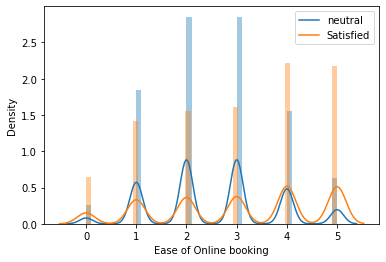

In [29]:
_= sns.distplot(label_1['Ease of Online booking'])
_= sns.distplot(label_0['Ease of Online booking'])
plt.legend(labels=["neutral","Satisfied"])

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


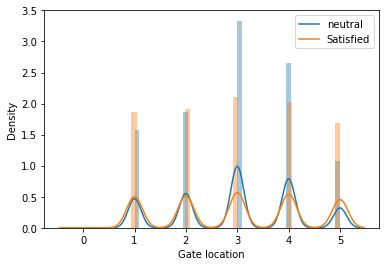

In [30]:
_= sns.distplot(label_1['Gate location'])
_= sns.distplot(label_0['Gate location'])
plt.legend(labels=["neutral","Satisfied"])

<AxesSubplot:>

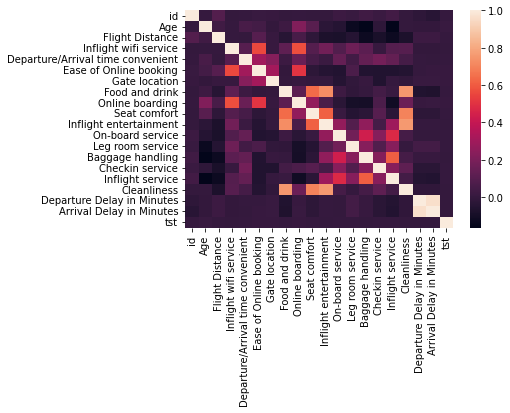

In [31]:
sns.heatmap(label_1.corr())

<AxesSubplot:>

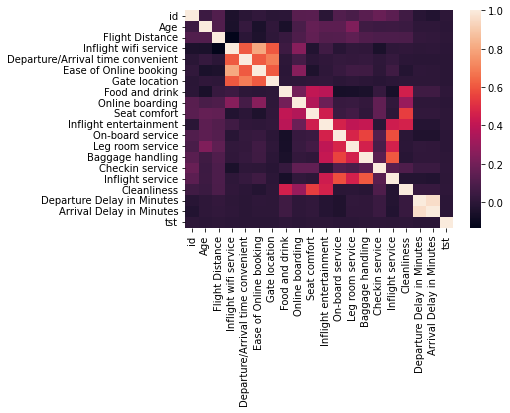

In [32]:
sns.heatmap(label_0.corr())

In [33]:
label_1.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'tst'],
      dtype='object')

In [34]:
def plt_categorical(df,col_name,plt_title):
    ax = df[col_name].value_counts().transpose().plot.bar(figsize=(4, 4), legend=False)
    ax.set_xlabel(col_name)
    ax.set_ylabel('Count')

    plt.title(plt_title)
    plt.tight_layout()
    plt.show()

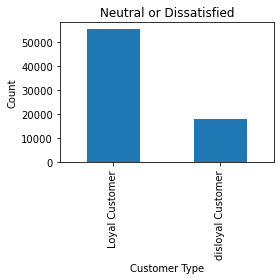

In [35]:
plt_categorical(label_1,'Customer Type','Neutral or Dissatisfied')

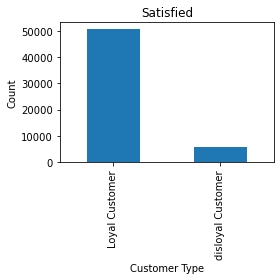

In [36]:
plt_categorical(label_0,'Customer Type','Satisfied')

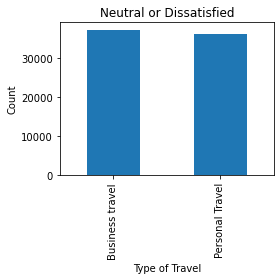

In [37]:
plt_categorical(label_1,'Type of Travel','Neutral or Dissatisfied')

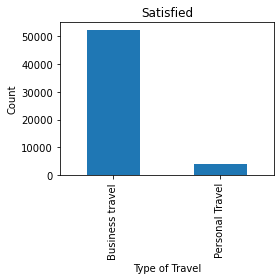

In [38]:
plt_categorical(label_0,'Type of Travel','Satisfied')

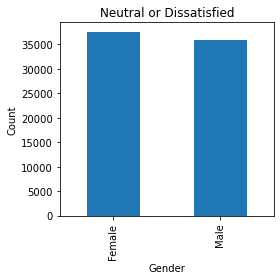

In [39]:
plt_categorical(label_1,'Gender','Neutral or Dissatisfied')

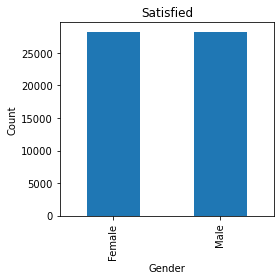

In [40]:
plt_categorical(label_0,'Gender','Satisfied')

In [41]:
#Chi Square Analysis 
# Given that our label is nominal and so are many independent variables, we use
# Chi square analysis to test the correlation between them: According the the 
# P value results,we can discard the uncorrelated features.

In [42]:
##Feature Selection 

#label_1.columns
#label_1.dtypes == 'object'

nominal_columns = ['Gender','Customer Type','Type of Travel','Class']

In [43]:
## Introduce ChiSquare Class
class Chisquare:
    
    def __init__(self,dataframe):
        
        self.df = dataframe
        self.p = None # p-value
        self.chi2 = None # Chi Test Statistic
        self.dof  = None 
        self.dfObserved = None 
        self.dfExpected = None 
        
    def _print_chisquare_result(self,colX,alpha):
        result = ""
        
        if self.p < alpha : 
            result = " {} -- Important predictor. Chi-statistic : {:.2f}, p-value : {:.4f}".format(colX,self.chi2,self.p)
        
        else :
            result = " {} -- Not Important predictor.  Chi-statistic : {:.2f}, p-value : {:.4f}".format(colX,self.chi2,self.p)
            
        print(result)
        
    def TestIndependence(self,colX,colY,alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X)
        
        chi2,p,dof,expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof
        self.dfExpected = pd.DataFrame(expected,columns = self.dfObserved.columns,index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)
        
        
## Initialize ChiSquare Class

cT = Chisquare(dataset)  

In [44]:
for var in nominal_columns:
    cT.TestIndependence(colX=var, colY='satisfaction')

 Gender -- Important predictor. Chi-statistic : 16.35, p-value : 0.0001
 Customer Type -- Important predictor. Chi-statistic : 4493.19, p-value : 0.0000
 Type of Travel -- Important predictor. Chi-statistic : 26282.52, p-value : 0.0000
 Class -- Important predictor. Chi-statistic : 32906.17, p-value : 0.0000


In [45]:
# ANOVA cannot prove causation.It can tell us whether the mean value of independent
# variables of each label group are different at a statistically significant level.
# In this case , our null hypothesis is that all group mean height are the same.

#Feature Selection 
label_1.columns
label_1.dtypes == 'object'

id                                   False
Gender                                True
Customer Type                         True
Age                                  False
Type of Travel                        True
Class                                 True
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfactio

In [46]:
continuous_columns = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

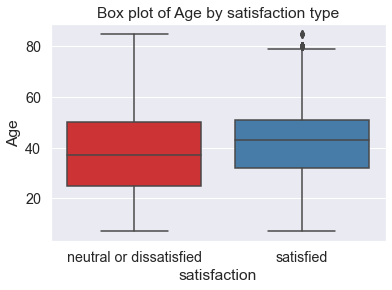

In [47]:
sns.set(font_scale = 1.3)

ax = sns.boxplot(x='satisfaction',y='Age',data=dataset,palette="Set1",linewidth= 1.5)
_= ax.set_title("Box plot of Age by satisfaction type")
plt.show()

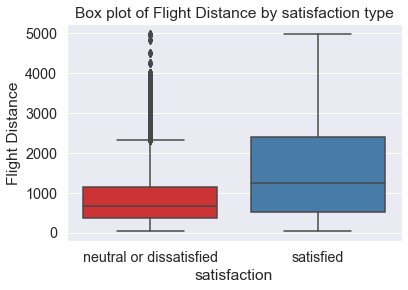

In [48]:
sns.set(font_scale = 1.3)

ax = sns.boxplot(x='satisfaction',y='Flight Distance',data=dataset,palette="Set1",linewidth= 1.5)
_= ax.set_title("Box plot of Flight Distance by satisfaction type")
plt.show()

In [49]:
# Check p_score of normal distribution 
print(stats.normaltest(dataset['Age'],axis = 0))

NormaltestResult(statistic=7524.6216624763765, pvalue=0.0)


In [50]:
# Now we can create an Ordinary Least Square(OLS model) as a precursor to the ANOVA
# Before the ANOVA, we check the OLS residuals are normally distributed. This is 
# another important prior assumption : 

# The residuals look not normal at all. Thus we cannot run ANOVA. 

In [51]:
chec_chnnl = dataset[['satisfaction','Age','Flight Distance','Inflight wifi service','Departure Delay in Minutes','Arrival Delay in Minutes']]

In [52]:
def label_enc(col_arr,df):
    Label_enc = LabelEncoder()
    
    for i in range(0,len(col_arr)):
        Label_enc.fit(df[col_arr[i]])
        df[col_arr[i]]  = Label_enc.transform(df[col_arr[i]]) 

In [53]:
label_enc(['satisfaction'],chec_chnnl)

C:\Users\khans\AppData\Local\Temp/ipykernel_2344/3187001471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_arr[i]]  = Label_enc.transform(df[col_arr[i]])


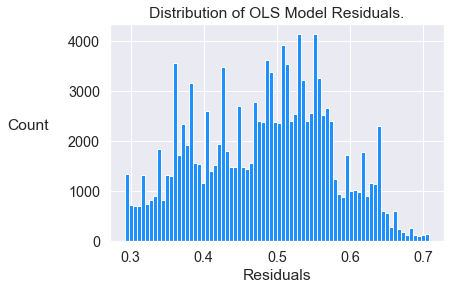

                sum_sq        df            F  PR(>F)
Age         573.795065       1.0  2378.024191     0.0
Residual  31338.350423  129878.0          NaN     NaN


In [54]:
annova_model = ols("satisfaction ~ Age",chec_chnnl).fit()
resids = annova_model.resid
hist2 = plt.hist(np.absolute(resids),bins = 'auto',color = 'dodgerblue')

#Data looks normally distributed. 
_= plt.title("Distribution of OLS Model Residuals.")
_= plt.xlabel('Residuals')
_= plt.ylabel("Count",rotation = 0,labelpad=40)
plt.show()

#Call for ANOVA function if residuals are normally distributed.
table = sm.stats.anova_lm(annova_model,typ = 2)
print(table)

In [55]:
# In one way ANOVA the null hypothesis is that the means of the age are equal.
# We can reject the null hypothesis if p < 0.05.

In [56]:
chec_chnnl.rename(columns= {'Flight Distance' : 'Flight_Distance',
                            'Inflight wifi service' : 'Inflight_wifi_service',
                            'Departure Delay in Minutes' : 'Departure_Delay_in_Minutes',
                            'Arrival Delay in Minutes' : 'Arrival_Delay_in_Minutes'
                            },inplace = True)

C:\Users\khans\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


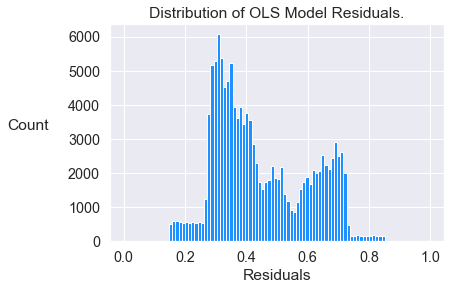

                       sum_sq        df             F  PR(>F)
Flight_Distance   2835.541138       1.0  12665.660936     0.0
Residual         29076.604351  129878.0           NaN     NaN


In [57]:
annova_model_1 = ols("satisfaction ~ Flight_Distance",chec_chnnl).fit()
resids = annova_model_1.resid
hist2 = plt.hist(np.absolute(resids),bins = 'auto',color = 'dodgerblue')

#Data looks normally distributed. 
_= plt.title("Distribution of OLS Model Residuals.")
_= plt.xlabel('Residuals')
_= plt.ylabel("Count",rotation = 0,labelpad=40)
plt.show()
#Call for ANOVA function if residuals are normally distributed.
table = sm.stats.anova_lm(annova_model_1,typ = 2)
print(table)

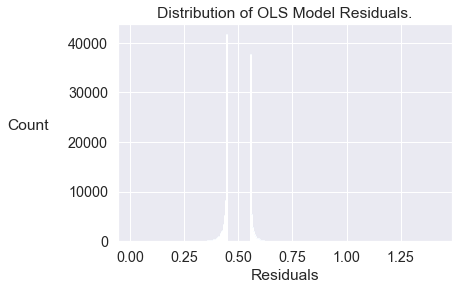

                                  sum_sq        df           F        PR(>F)
Departure_Delay_in_Minutes     82.158903       1.0  335.238409  8.634339e-75
Residual                    31829.986585  129878.0         NaN           NaN


In [58]:
annova_model_2 = ols("satisfaction ~ Departure_Delay_in_Minutes",chec_chnnl).fit()
resids = annova_model_2.resid
hist2 = plt.hist(np.absolute(resids),bins = 'auto',color = 'dodgerblue')

#Data looks normally distributed. 
_= plt.title("Distribution of OLS Model Residuals.")
_= plt.xlabel('Residuals')
_= plt.ylabel("Count",rotation = 0,labelpad=40)
plt.show()
#Call for ANOVA function if residuals are normally distributed.
table = sm.stats.anova_lm(annova_model_2,typ = 2)
print(table)

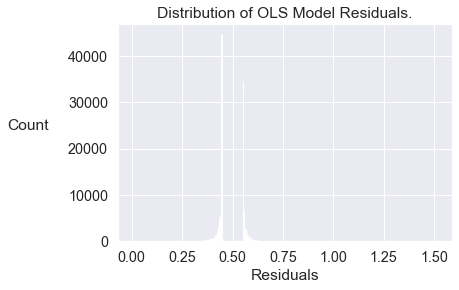

                                sum_sq        df           F        PR(>F)
Arrival_Delay_in_Minutes    108.047401       1.0  441.231827  8.501049e-98
Residual                  31804.098087  129878.0         NaN           NaN


In [59]:
annova_model_3 = ols("satisfaction ~ Arrival_Delay_in_Minutes",chec_chnnl).fit()
resids = annova_model_3.resid
hist3 = plt.hist(np.absolute(resids),bins = 'auto',color = 'dodgerblue')

#Data looks normally distributed. 
_= plt.title("Distribution of OLS Model Residuals.")
_= plt.xlabel('Residuals')
_= plt.ylabel("Count",rotation = 0,labelpad=40)
plt.show()
#Call for ANOVA function if residuals are normally distributed.
table = sm.stats.anova_lm(annova_model_3,typ = 2)
print(table)

# 1.6 Label Encoding for non-numerical columns 

In [60]:
def label_enco(df):
    le = LabelEncoder()
    
    for col in df.columns :
        if df[col].dtype == "object":
            df[col] = le.fit_transform(df[col])

In [61]:
dataset_cpy = dataset.copy()

In [62]:
label_enco(dataset_cpy)

In [63]:
dataset_cpy.head()

id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0   70172       1              0   13               1      2              460   
1    5047       1              1   25               0      0              235   
2  110028       0              0   26               0      0             1142   
3   24026       0              0   25               0      0              562   
4  119299       1              0   61               0      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  tst  
0                          25                      18.0             0    0  
1                           1                       6.0             0    0  
2                           0                       0.0             1    0  
3                          11                       9.0             0    0  
4                           0                       0.0             1    0

In [64]:
# transform data
def scaler(df,col_name):
    
    df[col_name] = np.round((df[col_name]-df[col_name].mean())/df[col_name].std(),decimals= 2)
    
    return df[col_name]

In [65]:
scaler(dataset_cpy,'Flight Distance')
scaler(dataset_cpy,'Inflight wifi service')
scaler(dataset_cpy,'Departure Delay in Minutes')
scaler(dataset_cpy,'Arrival Delay in Minutes')

0          0.08
1         -0.24
2         -0.39
3         -0.16
4         -0.39
5         -0.39
6          0.21
7         -0.39
8         -0.39
9         -0.39
10        -0.39
11        -0.39
12        -0.18
13        -0.39
14         0.52
15        -0.39
16         0.93
17        -0.13
18        -0.26
19         0.08
20        -0.29
21        -0.39
22         0.36
23        -0.39
24         0.75
25         0.34
26        -0.39
27        -0.18
28        -0.08
29        -0.39
30        -0.39
31        -0.39
32         2.73
33         0.23
34        -0.39
35        -0.37
36        -0.39
37         0.13
38         0.41
39        -0.39
40        -0.39
41         0.21
42        -0.39
43        -0.39
44        -0.00
45        -0.39
46        -0.39
47        -0.39
48        -0.39
49        -0.39
50        -0.18
51        -0.37
52        -0.39
53        -0.39
54        -0.13
55         0.86
56        -0.26
57        -0.39
58         0.28
59        -0.39
60        -0.39
61        -0.39
62      

In [66]:
dataset_cpy.head()

id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0   70172       1              0   13               1      2            -0.73   
1    5047       1              1   25               0      0            -0.96   
2  110028       0              0   26               0      0            -0.05   
3   24026       0              0   25               0      0            -0.63   
4  119299       1              0   61               0      0            -0.98   

   Inflight wifi service  Departure/Arrival time convenient  \
0                   0.20                                  4   
1                   0.20                                  2   
2                  -0.55                                  2   
3                  -0.55                                  5   
4                   0.20                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  tst  
0                        0.27                      0.08             0    0  
1                       -0.36                     -0.24             0    0  
2                       -0.39                     -0.39             1    0  
3                       -0.10                     -0.16             0    0  
4                       -0.39                     -0.39             1    0

In [67]:
dataset_cpy.drop(['tst','id'],axis = 1,inplace= True)

In [68]:
dataset_cpy.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1      2            -0.73   
1       1              1   25               0      0            -0.96   
2       0              0   26               0      0            -0.05   
3       0              0   25               0      0            -0.63   
4       1              0   61               0      0            -0.98   

   Inflight wifi service  Departure/Arrival time convenient  \
0                   0.20                                  4   
1                   0.20                                  2   
2                  -0.55                                  2   
3                  -0.55                                  5   
4                   0.20                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
0                        0.27                      0.08             0  
1                       -0.36                     -0.24             0  
2                       -0.39                     -0.39             1  
3                       -0.10                     -0.16             0  
4                       -0.39                     -0.39             1

In [69]:
# Training Data 
Y_train = dataset_cpy['satisfaction']
X_train = dataset_cpy.drop('satisfaction',axis=1)

In [70]:
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,random_state=123,test_size=0.30)

In [71]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train,y_train)

In [72]:
predictions = dtree.predict(x_test)

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     22010
           1       0.94      0.93      0.94     16954

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964

[[21080   930]
 [ 1125 15829]]


In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
prediction_knn = classifier.predict(x_test)

In [75]:
print(classification_report(prediction_knn,y_test))
print(confusion_matrix(prediction_knn,y_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     25102
           1       0.79      0.95      0.86     13862

    accuracy                           0.89     38964
   macro avg       0.88      0.90      0.88     38964
weighted avg       0.90      0.89      0.89     38964

[[21511  3591]
 [  694 13168]]


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(x_train,y_train)
predict_gb = gb_clf.predict(x_test)

In [77]:
print(classification_report(predict_gb,y_test))
print(confusion_matrix(predict_gb,y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     25700
           1       0.74      0.93      0.82     13264

    accuracy                           0.86     38964
   macro avg       0.85      0.88      0.86     38964
weighted avg       0.88      0.86      0.87     38964

[[21307  4393]
 [  898 12366]]


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [80]:
pipe.score(x_test,y_test)
predicted_logist = pipe.predict(x_test)
print(classification_report(predicted_logist,y_test))
print(confusion_matrix(predicted_logist,y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     22764
           1       0.84      0.87      0.85     16200

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964

[[20025  2739]
 [ 2180 14020]]


In [81]:
from sklearn.naive_bayes import GaussianNB
Gauss = GaussianNB()
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)
pipe.score(x_test,y_test)

predicted_gaussian = pipe.predict(x_test)
print(classification_report(predicted_gaussian,y_test))
print(confusion_matrix(predicted_gaussian,y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     22764
           1       0.84      0.87      0.85     16200

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964

[[20025  2739]
 [ 2180 14020]]


In [82]:
import xgboost as xgb 
xgb_model = xgb.XGBClassifier(objective = "binary:logistic",n_estimators = 150, random_state = 42, eval_metric=['auc','error','error@0.6'])

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)
pipe.score(x_test,y_test)

predicted_xgb = pipe.predict(x_test)
print(classification_report(predicted_xgb,y_test))
print(confusion_matrix(predicted_xgb,y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     22764
           1       0.84      0.87      0.85     16200

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964

[[20025  2739]
 [ 2180 14020]]


In [86]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=20).fit_transform(np.absolute(x_train), y_train)